<a href="https://colab.research.google.com/github/ShahabSabzi/Electricity-Demand-Forecasting-Using-Deep-Learning/blob/main/preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import datetime as datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data_15 = pd.read_csv('2015.csv')
data_16 = pd.read_csv('2016.csv')
data_17 = pd.read_csv('2017.csv')
data_18 = pd.read_csv('2018.csv')
data_19 = pd.read_csv('2019.csv')
data_20 = pd.read_csv('2020.csv')

Some info about 2015 demand data


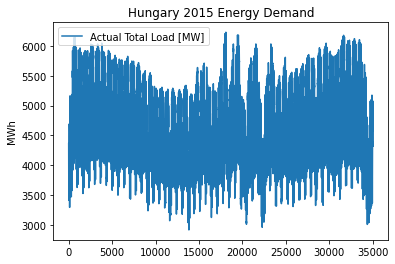

,Actual Total Load [MW]
count,35044.000000
mean,4747.883489
std,687.968545
min,2921.000000
25%,4170.000000
50%,4849.000000
75%,5302.000000
max,6226.000000


In [61]:
print ("Some info about 2015 demand data")

data_15.plot(title="Hungary 2015 Energy Demand")
plt.ylabel("MWh")
plt.show()
data_15.describe()

Some info about 2016 demand data


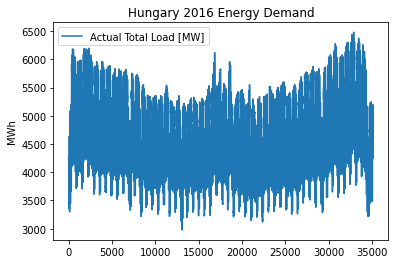

,Actual Total Load [MW]
count,35140.000000
mean,4768.380137
std,687.381336
min,2978.000000
25%,4225.000000
50%,4863.000000
75%,5288.000000
max,6480.000000


In [62]:
print ("Some info about 2016 demand data")

data_16.plot(title="Hungary 2016 Energy Demand")
plt.ylabel("MWh")
plt.show()
data_16.describe()

Some info about 2017 demand data


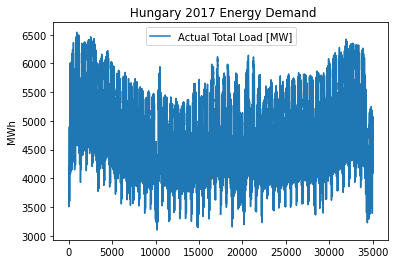

,Actual Total Load [MW]
count,35044.000000
mean,4903.852443
std,707.846238
min,3103.000000
25%,4341.000000
50%,4991.000000
75%,5418.250000
max,6543.000000


In [63]:
print ("Some info about 2017 demand data")
data_17.plot(title=" Hungary 2017 Energy Demand")
plt.ylabel("MWh")
plt.show()
data_17.describe()

Some info about 2018 demand data


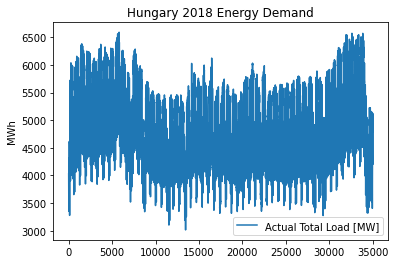

,Actual Total Load [MW]
count,35044.000000
mean,4943.916134
std,717.978121
min,3015.000000
25%,4385.000000
50%,5026.000000
75%,5456.000000
max,6592.000000


In [64]:
print ("Some info about 2018 demand data")
data_18.plot(title="Hungary 2018 Energy Demand")
plt.ylabel("MWh")
plt.show()
data_18.describe()

Some info about 2019 demand data


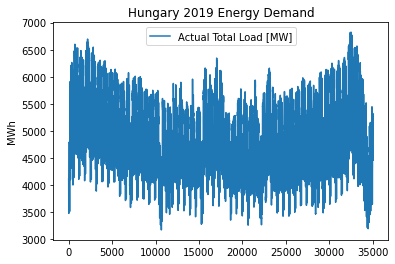

,Actual Total Load [MW]
count,35044.000000
mean,4970.015837
std,705.061303
min,3175.000000
25%,4409.000000
50%,5057.000000
75%,5478.000000
max,6823.000000


In [65]:
print ("Some info about 2019 demand data")

data_19.plot(title="Hungary 2019 Energy Demand")
plt.ylabel("MWh")
plt.show()
data_19.describe()

Some info about 2020 demand data


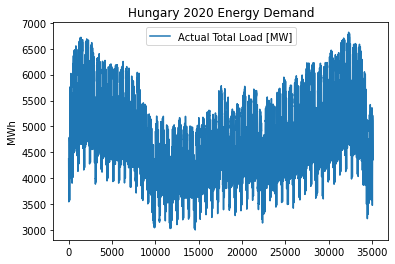

,Actual Total Load [MW]
count,35140.000000
mean,4884.528002
std,779.227408
min,2998.000000
25%,4307.000000
50%,4859.000000
75%,5432.000000
max,6820.000000


In [66]:
print ("Some info about 2020 demand data")
data_20.plot(title="Hungary 2020 Energy Demand")
plt.ylabel("MWh")
plt.show()
data_20.describe()

Merging and plotting 6-year data

In [36]:
data = pd.concat([data_15,data_16,data_17,data_18,data_19,data_20], axis=0)
data = data.reset_index()
data = data.drop(columns = "index", axis = 1)

In [37]:
# Removing duplicates
data = data.drop_duplicates(subset="Time (CET)")

In [38]:
data = data.drop(columns = "Time (CET)", axis = 1) #remove Time column in data and replacing with meaningful datetime 

In [39]:
data['datetime'] = pd.date_range(start='01-01-2015t00:00', periods=len(data), freq="15min")  #specifying datetime
data = data[['datetime', 'Actual Total Load [MW]']]

In [40]:
data = data.set_index('datetime')

In [41]:
data

,Actual Total Load [MW]
datetime,
2015-01-01 00:00:00,4363
2015-01-01 00:15:00,4304
2015-01-01 00:30:00,4239
2015-01-01 00:45:00,4178
2015-01-01 01:00:00,4165
...,...
2020-12-31 22:45:00,4441
2020-12-31 23:00:00,4415
2020-12-31 23:15:00,4358


# number of data is perfect with no missing Value

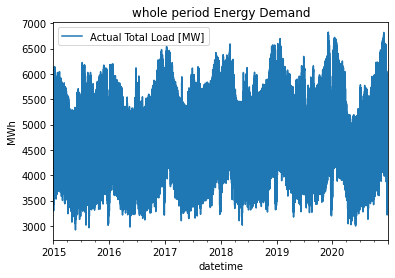

In [42]:
data.plot(title="whole period Energy Demand")
plt.ylabel("MWh")
plt.show()

**Spliting the data into train and test. Since it is a time series forecasting, for now there is no x and y, and seasonality will be examined for the prediction.**

```



In [43]:
split_date = '1/1/2019  12:00:00 AM'
data_train = data.loc[data.index <= split_date]
data_test = data.loc[data.index > split_date]

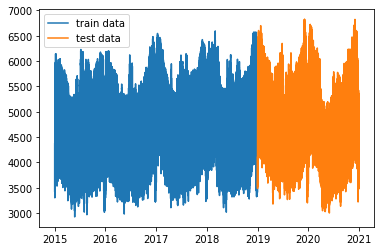

In [60]:
plt.plot(data_train)
plt.plot(data_test)
plt.legend(["train data", "test data"])
